In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("cleaned_census.csv")
df.head(10)


,age,workclass,education_level,education-num,marital-status,occupation,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,27,2,13,1,2,4,4,0,41310,0,24,25,0
1,63,4,12,14,2,4,4,0,41310,0,50,38,0
2,36,4,11,9,2,3,1,0,41310,0,90,34,0
3,18,2,11,9,4,10,4,0,34095,0,3,38,0
4,19,2,11,9,4,7,4,1,34095,0,20,38,0
5,55,4,11,9,0,3,4,0,34095,0,60,38,0
6,19,2,0,6,4,7,4,1,34095,0,24,38,0
7,46,2,12,14,0,3,4,1,27828,0,50,38,1
8,35,2,9,13,0,3,4,0,27828,0,50,38,1
9,47,3,14,15,0,9,4,0,27828,0,50,38,1


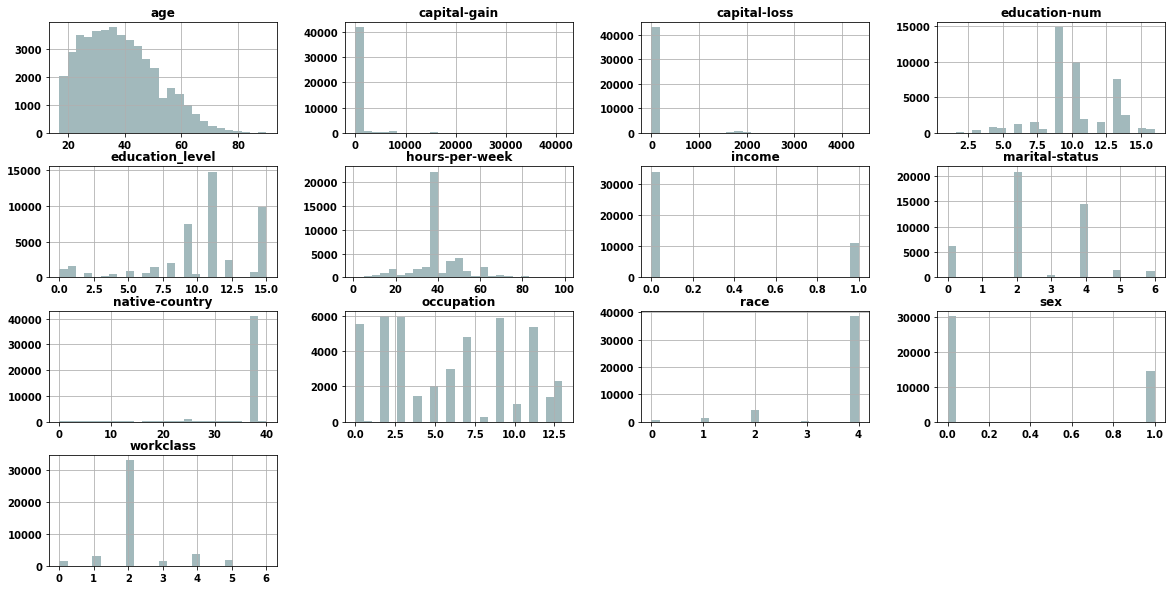

In [3]:
import matplotlib.pyplot as plt
df.hist(bins=25, grid=True, figsize=(20,10),color="#a2b9bc")
plt.show()

<module 'seaborn' from 'C:\\Python\\lib\\site-packages\\seaborn\\__init__.py'>

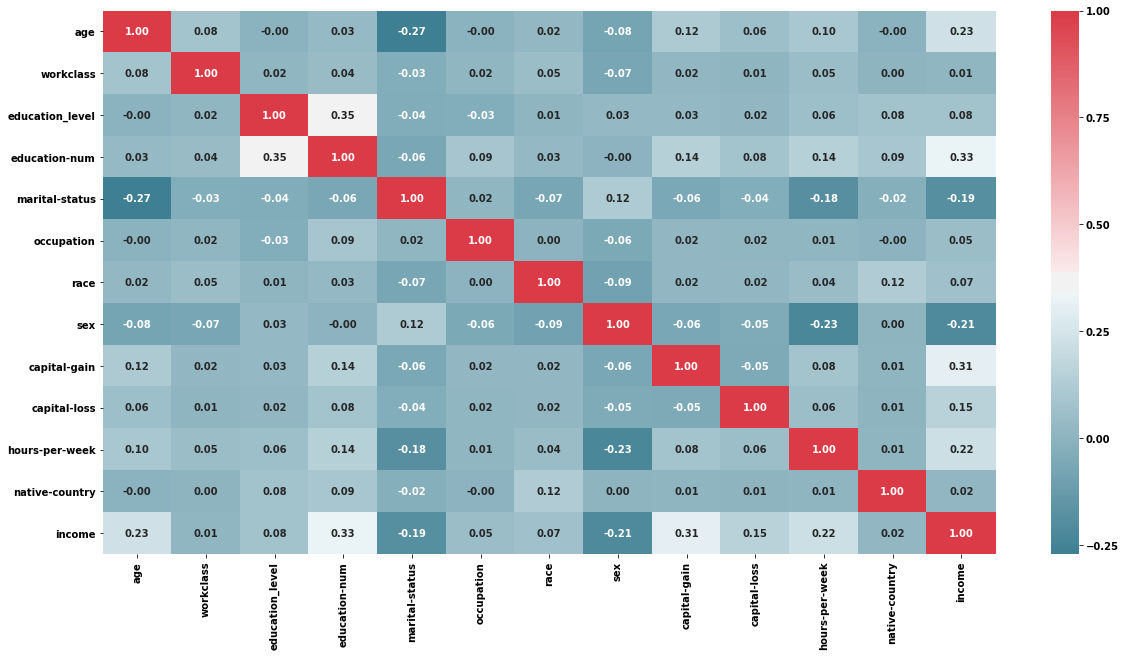

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20,10))
g = sns.heatmap(df.corr(),annot=True, fmt = ".2f", cmap = sns.diverging_palette(220, 10, as_cmap=True))
sns

In [5]:
#define X, Y
X = df.iloc[:, 0:12].values
y = df.iloc[:, 12].values

In [6]:
# Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [7]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)

In [8]:
 # Transform the training and testing data using the X_scaler

X_train= X_scaler.fit_transform(X_train)
X_test= X_scaler.transform(X_test)

In [9]:
# create a deep neural network with 12 inputs, 6 hidden nodes, and 1 outputs
from keras.models import Sequential
from keras.layers import Dense

deep_model = Sequential()
deep_model.add(Dense(output_dim=6, activation='relu', input_dim=12))
deep_model.add(Dense(output_dim=6, activation='relu'))
deep_model.add(Dense(output_dim=1, activation='sigmoid'))

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


In [10]:
deep_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6)                 78        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 127
Trainable params: 127
Non-trainable params: 0
_________________________________________________________________


In [25]:
#compile and train the model
deep_model.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

history=deep_model.fit(
    X_train,
    y_train,
    validation_split=0.33,
    batch_size=10,
    epochs=100,
    shuffle=True
)

Train on 22608 samples, validate on 11136 samples
Epoch 1/100
22608/22608 [==============================] - 3s 112us/step - loss: 0.3302 - acc: 0.8439 - val_loss: 0.3230 - val_acc: 0.8466
Epoch 2/100
22608/22608 [==============================] - 2s 87us/step - loss: 0.3300 - acc: 0.8443 - val_loss: 0.3232 - val_acc: 0.8477
Epoch 3/100
22608/22608 [==============================] - 2s 107us/step - loss: 0.3297 - acc: 0.8441 - val_loss: 0.3237 - val_acc: 0.8470
Epoch 4/100
22608/22608 [==============================] - 2s 85us/step - loss: 0.3293 - acc: 0.8445 - val_loss: 0.3236 - val_acc: 0.8468
Epoch 5/100
22608/22608 [==============================] - 2s 93us/step - loss: 0.3295 - acc: 0.8446 - val_loss: 0.3237 - val_acc: 0.8462
Epoch 6/100
22608/22608 [==============================] - 2s 95us/step - loss: 0.3293 - acc: 0.8446 - val_loss: 0.3250 - val_acc: 0.8457
Epoch 7/100
22608/22608 [==============================] - 2s 84us/step - loss: 0.3296 - acc: 0.8447 - val_loss: 0.3256 

22608/22608 [==============================] - 2s 87us/step - loss: 0.3291 - acc: 0.8447 - val_loss: 0.3257 - val_acc: 0.8454
Epoch 60/100
22608/22608 [==============================] - 3s 111us/step - loss: 0.3291 - acc: 0.8441 - val_loss: 0.3248 - val_acc: 0.8438
Epoch 61/100
22608/22608 [==============================] - 2s 93us/step - loss: 0.3290 - acc: 0.8442 - val_loss: 0.3248 - val_acc: 0.8457
Epoch 62/100
22608/22608 [==============================] - 2s 78us/step - loss: 0.3287 - acc: 0.8447 - val_loss: 0.3250 - val_acc: 0.8456
Epoch 63/100
22608/22608 [==============================] - 2s 99us/step - loss: 0.3289 - acc: 0.8438 - val_loss: 0.3259 - val_acc: 0.8444
Epoch 64/100
22608/22608 [==============================] - 2s 85us/step - loss: 0.3292 - acc: 0.8433 - val_loss: 0.3255 - val_acc: 0.8458
Epoch 65/100
22608/22608 [==============================] - 2s 82us/step - loss: 0.3287 - acc: 0.8451 - val_loss: 0.3277 - val_acc: 0.8442
Epoch 66/100
22608/22608 [=============

In [26]:
import matplotlib.pyplot as plt
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


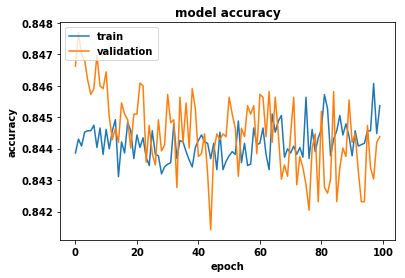

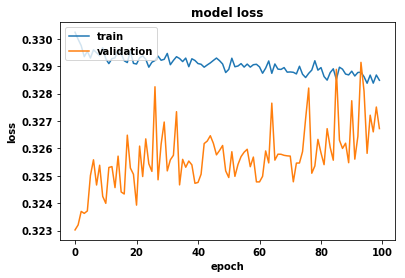

In [32]:
#  "Accuracy"
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [34]:
#evaluate the model
model_loss, model_accuracy = deep_model.evaluate(X_test, y_test)
print(f"Deep Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

11249/11249 [==============================] - 0s 13us/step
Deep Neural Network - Loss: 0.32842947163945546, Accuracy: 0.8458529647291687


In [35]:
#predict
predictions = deep_model.predict(X_test[:5])
predictions = (predictions>0.5)

In [31]:
print(f"Predicted Income: {predictions}")
print(f"Actual Income: {list(y_test[:5])}")

Predicted Income: [[False]
 [False]
 [False]
 [False]
 [ True]]
Actual Income: [0, 0, 0, 0, 1]


In [36]:
import pickle

#creating and training a model
#serializing our model to a file called model.pkl
pickle.dump(deep_model, open("deep_model.pkl","wb"))